<a href="https://colab.research.google.com/github/JiaWeiXie/ntub_ai_bi/blob/main/gurobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gurobipy>=9.5.1 environs

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

DATA_PATH = "/content/drive/MyDrive/bidata/merge.xlsx"

df = pd.read_excel(DATA_PATH, sheet_name="return")

In [4]:
df.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2014-01-03,0.012552,0.045480,0.028212,-0.022211,0.006137,0.000715,0.007791,0.010668,0.003322,...,-0.009849,-0.000364,-0.002409,0.004784,0.009034,0.006240,0.004328,0.007494,0.007058,-0.009626
1,2014-01-06,-0.004931,0.018294,-0.009614,0.005438,-0.037204,-0.003581,0.008830,0.013113,-0.010621,...,-0.000715,-0.005469,0.001507,-0.006036,-0.001742,-0.000795,0.006455,-0.003365,-0.007058,-0.002187
2,2014-01-07,0.014200,-0.004449,0.012268,-0.007178,0.001983,0.010846,0.011654,-0.007693,0.012094,...,0.028439,0.017039,0.014049,0.015331,0.002902,0.013942,0.019752,0.010247,0.003031,0.003745
3,2014-01-08,0.016230,0.026404,-0.007805,0.006313,-0.002578,0.009746,0.021845,0.008969,0.007699,...,0.018585,-0.003962,-0.003271,0.001849,-0.000580,-0.000392,0.024205,-0.000742,0.008705,-0.011278
4,2014-01-09,0.000343,0.062773,0.011069,-0.012852,0.016933,0.003368,0.045698,0.001784,0.009691,...,-0.002536,0.003962,-0.009776,0.003687,0.004051,-0.019528,-0.009902,0.004627,0.007306,0.006907


In [5]:
# Return unbiased variance over requested axis.
var = df.iloc[:, 1:].var()
var.head()

A       0.000245
AAL     0.001010
AAP     0.000422
AAPL    0.000316
ABBV    0.000314
dtype: float64

In [6]:
# Compute pairwise covariance of columns, excluding NA/null values.
cov = df.iloc[:, 1:].cov()
cov.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,0.000245,0.000161,0.000095,0.000138,0.000121,0.000102,0.000144,0.000139,0.000135,0.000165,...,0.000173,0.000061,0.000104,0.000109,0.000143,0.000101,0.000123,0.000182,0.000135,0.000134
AAL,0.000161,0.001010,0.000182,0.000143,0.000115,0.000136,0.000160,0.000107,0.000152,0.000136,...,0.000431,0.000039,0.000218,0.000186,0.000217,0.000168,0.000212,0.000216,0.000310,0.000120
AAP,0.000095,0.000182,0.000422,0.000096,0.000099,0.000108,0.000100,0.000090,0.000106,0.000105,...,0.000173,0.000081,0.000114,0.000110,0.000130,0.000113,0.000108,0.000139,0.000155,0.000098
AAPL,0.000138,0.000143,0.000096,0.000316,0.000102,0.000093,0.000153,0.000123,0.000137,0.000195,...,0.000180,0.000068,0.000105,0.000094,0.000125,0.000105,0.000111,0.000188,0.000108,0.000130
ABBV,0.000121,0.000115,0.000099,0.000102,0.000314,0.000120,0.000117,0.000122,0.000104,0.000123,...,0.000144,0.000056,0.000100,0.000110,0.000103,0.000083,0.000118,0.000129,0.000109,0.000122


In [7]:
ret = df.iloc[:, 1:].mean()
ret.head()

A       0.000719
AAL    -0.000142
AAP     0.000405
AAPL    0.001150
ABBV    0.000640
dtype: float64

In [8]:
import gurobipy as gp

from environs import Env

env = Env()
env.read_env("/content/drive/MyDrive/bidata/gurobi_env")
"""
GRBGETKEY=
WLSACCESSID=
WLSSECRET=
LICENSEID=
"""

# grbgetkey 
GRBGETKEY = env("GRBGETKEY")

# WLS
WLSACCESSID = env("WLSACCESSID")
WLSSECRET = env("WLSSECRET")
LICENSEID = env.int("LICENSEID")

env = gp.Env(empty=True)
env.setParam("WLSACCESSID", WLSACCESSID)
env.setParam("WLSSECRET", WLSSECRET)
env.setParam("LICENSEID", LICENSEID)
env.start()

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID
Academic license - for non-commercial use only - registered to 11065001@ntub.edu.tw


<gurobipy.Env, Parameter changes: WLSAccessID=(user-defined), WLSSecret=(user-defined), LicenseID=(user-defined)>

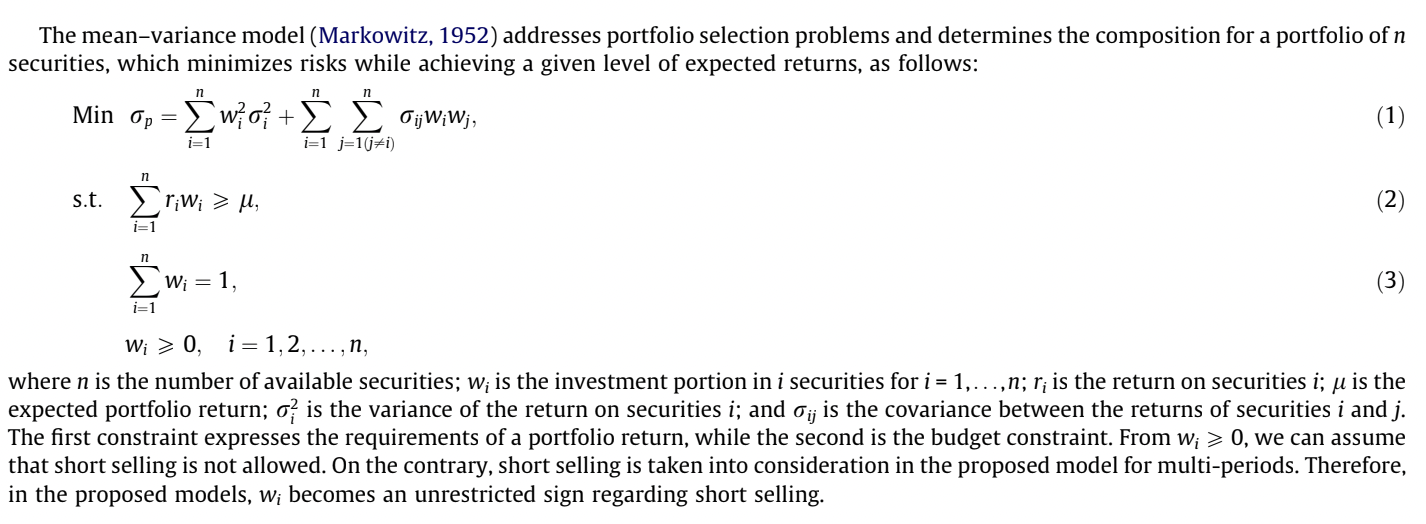

In [9]:
from random import sample

from gurobipy import GRB, quicksum

com_num = var.count()
# 隨機 10 個
n = list(
        sample(
            range(com_num),
            10,
        ),
    )
mu = 0.001

try:

    # Create a new model
    m = gp.Model("mean–variance")

    # Create variables
    w = {}
    for i in n:
        w[i] = m.addVar(
                    lb=0,
                    ub=1,
                    obj=1 / len(n),
                    name=f"w_{i}",
                )
    m.update()

    # Set objective
    m.setObjective(
        (
            quicksum(
                [
                    w[i] ** 2 * var.iloc[i]
                    for i in n
                ]
            ) + 
            quicksum(
                [
                    cov.iloc[i,j] * w[i] * w[j]
                    for i in n
                    for j in n
                    if i != j
                ]
            )
        ),
        GRB.MINIMIZE,
    ) 

    # Add constraint
    m.addConstr(
            quicksum(
                [
                    ret.iloc[i] * w[i]
                    for i in n
                ]
            ) >= mu,
            "c_0",
        ) 

    m.addConstr(
            quicksum(
                [
                    w[i] 
                    for i in n
                ]
            ) == 1,
            "c_1",
        )

    # Optimize model
    m.optimize()

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Restricted license - for non-production use only - expires 2023-10-25
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 2 rows, 10 columns and 20 nonzeros
Model fingerprint: 0xf6b0f5ce
Model has 55 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-04, 1e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 1e+00]
Presolve time: 0.02s
Presolved: 2 rows, 10 columns, 20 nonzeros
Presolved model has 55 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 9
 AA' NZ     : 5.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.64723604e+05 -1.64723604e+05  9.50e+03 3.10e-07